# CSC 578 NN&DL Fall 2021
## HW7: Image Classification using a CNN



This code is slightly modified from the TensorFlow tutorial [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets. Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.

Note that there are **three places** in the code, indicated with **IMPORTANT**, where you have to choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.

### Import Tensorflow
**IMPORTANT (1)**
Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)  # check the TF version!
from tensorflow.keras import regularizers,optimizers

from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant

2.7.0


In [ ]:
# For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models,Sequential

# For TF version 1 (need both lines)
# from tensorflow import keras
# from keras import datasets, layers, models

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LSTM, Activation, Conv2D, Reshape, Average, Bidirectional,Resizing,Rescaling

### Download and prepare the CIFAR10 dataset¶

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.


In [ ]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)


In [ ]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(train_images)


In [ ]:
train_images
valid_labels

array([[8],
       [5],
       [7],
       ...,
       [3],
       [9],
       [0]], dtype=uint8)

### Verify the data
To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.

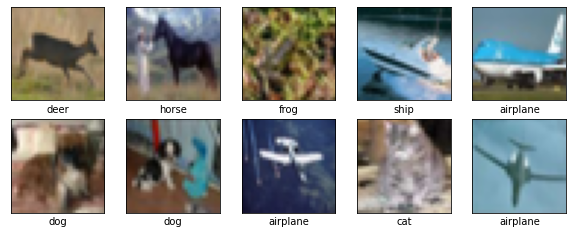

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional network
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3). The output layer has 10 nodes, corresponding to the number of categories of the images.

In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2 compatible with TF1's 'sparse_categorical_crossentropy' loss function).

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # As noted above

Verify the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compile the model
**IMPORTANT (2)** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])



### Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

### Evaluate the model
**IMPORTANT (3)** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 2s - loss: 2.3027 - accuracy: 0.1000
valid_accuracy=0.10000000149011612, valid_loss=2.302670955657959


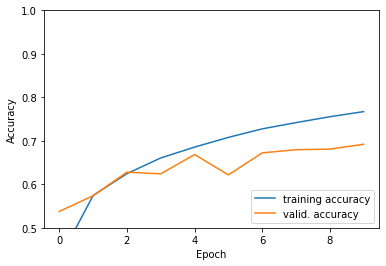

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

In [ ]:
#From the above graph we can examine overfitting as there is alot of around 11% and it will worse even with more epoch, we will try to make the network more deeper inorder to reduce the impact of overfitting.

### TO DO (by you): Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax. You should generate predictions and create/write a KAGGLE submission file.

In [ ]:
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = models.Sequential()
model.add(layers.Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size= (2,2), strides=2))

model.add(layers.Conv2D(96, kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Dropout(0.2, noise_shape=None, seed=None))



model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(BatchNormalization())
model.add(layers.Dense(64))

model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model.add(layers.Dense(64))
model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model.add(layers.Dense(10, activation = 'softmax'))


model.compile(optimizer="Nadam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))


Epoch 1/10
1250/1250 [==============================] - 26s 18ms/step - loss: 1.5866 - accuracy: 0.4324 - val_loss: 2.0008 - val_accuracy: 0.3776
Epoch 2/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.2371 - accuracy: 0.5630 - val_loss: 1.2980 - val_accuracy: 0.5451
Epoch 3/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.1077 - accuracy: 0.6170 - val_loss: 1.0066 - val_accuracy: 0.6459
Epoch 4/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.0324 - accuracy: 0.6418 - val_loss: 1.0359 - val_accuracy: 0.6316
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.9751 - accuracy: 0.6650 - val_loss: 0.9501 - val_accuracy: 0.6737
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.9263 - accuracy: 0.6805 - val_loss: 1.2190 - val_accuracy: 0.5844
Epoch 7/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.8926 - accuracy: 0.6943 - val_loss: 0.8938 -

In [ ]:
tes_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 811ms/epoch - 3ms/step
0.0


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])


In [ ]:
def plotLoss(param1,param2):

    epochs = range(1, len(param1) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, param1, 'b', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, param2, 'y', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()

    plt.show()

In [ ]:
def plot(param1,param2):

    epochs = range(1, len(param1) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, param1, 'b', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, param2, 'y', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.show()

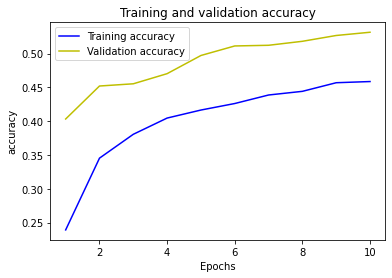

In [ ]:
val_accuracy = history2HiddenLayers_dict['val_accuracy']
accuracy = history2HiddenLayers_dict['accuracy']
plot(accuracy,val_accuracy)

In [ ]:
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = models.Sequential()
model.add(layers.Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(96, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size= (2,2), strides=2))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))

model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))

model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))

model.add(layers.Flatten())

model.add(Dropout(0.5, noise_shape=None, seed=None))

model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 26s 20ms/step - loss: 1.9306 - accuracy: 0.2592 - val_loss: 1.6274 - val_accuracy: 0.4245
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.5910 - accuracy: 0.4111 - val_loss: 1.4215 - val_accuracy: 0.4884
Epoch 3/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4609 - accuracy: 0.4651 - val_loss: 1.3693 - val_accuracy: 0.4992
Epoch 4/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3824 - accuracy: 0.5006 - val_loss: 1.2443 - val_accuracy: 0.5587
Epoch 5/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3258 - accuracy: 0.5230 - val_loss: 1.1668 - val_accuracy: 0.5817
Epoch 6/10
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2768 - accuracy: 0.5418 - val_loss: 1.1758 - val_accuracy: 0.5822
Epoch 7/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2380 - accuracy: 0.5584 - val_loss: 1.2192 -

In [ ]:
history2HiddenLayers_dict = history2.history
history2HiddenLayers_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = optimizers.RMSprop(learning_rate=lr_schedule)

In [ ]:
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size= (2,2), strides=2))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))

model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))

model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))

model.add(layers.Flatten())

model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
optimizer= optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 28s 20ms/step - loss: 1.9932 - accuracy: 0.2089 - val_loss: 2.0573 - val_accuracy: 0.1911
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.7863 - accuracy: 0.2891 - val_loss: 1.6696 - val_accuracy: 0.3446
Epoch 3/10
1250/1250 [==============================] - 24s 20ms/step - loss: 1.6886 - accuracy: 0.3348 - val_loss: 1.6244 - val_accuracy: 0.3824
Epoch 4/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.6287 - accuracy: 0.3697 - val_loss: 1.5403 - val_accuracy: 0.4162
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 1.5784 - accuracy: 0.3928 - val_loss: 1.5877 - val_accuracy: 0.4132
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 1.5380 - accuracy: 0.4122 - val_loss: 1.6093 - val_accuracy: 0.4013
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 1.4978 - accuracy: 0.4331 - val_loss: 1.6510 -

In [ ]:
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = models.Sequential()
model.add(layers.Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(96, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Dropout(0.2, noise_shape=None, seed=None))

model.add(layers.Conv2D(96, kernel_size=3, activation='relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.2, noise_shape=None, seed=None))

model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.2, noise_shape=None, seed=None))

model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.2, noise_shape=None, seed=None))

model.add(layers.Flatten())

model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model.add(layers.Dense(10, activation = 'softmax'))


model.compile(optimizer="Nadam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))


Epoch 1/10
1250/1250 [==============================] - 19s 14ms/step - loss: 1.9811 - accuracy: 0.2453 - val_loss: 16.2063 - val_accuracy: 0.1000
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.9814 - accuracy: 0.2393 - val_loss: 120.6044 - val_accuracy: 0.1000
Epoch 3/10
1250/1250 [==============================] - 19s 15ms/step - loss: 1.9832 - accuracy: 0.2541 - val_loss: 421.0735 - val_accuracy: 0.1000
Epoch 4/10
1250/1250 [==============================] - 18s 14ms/step - loss: 2.0250 - accuracy: 0.2298 - val_loss: 2119.6345 - val_accuracy: 0.1000
Epoch 5/10
1250/1250 [==============================] - 18s 14ms/step - loss: 2.0421 - accuracy: 0.2259 - val_loss: 25643.1465 - val_accuracy: 0.1000
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.0480 - accuracy: 0.2163 - val_loss: 5568.7964 - val_accuracy: 0.1000
Epoch 7/10
1250/1250 [==============================] - 18s 14ms/step - loss: 2.0973 - accuracy: 0.1803 - val

In [ ]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
IMG_SIZE = 180
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [ ]:
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(96, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(96, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=2, activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(layers.Dense(128, activation='relu'))  # As noted above
model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))

model.add(layers.Dense(10, activation = 'softmax'))

ValueError: ignored

In [ ]:
model = Sequential()
model.add(layers.Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(96, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))
model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))
model.add(layers.Conv2D(128, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 506s 404ms/step - loss: 2.8445 - accuracy: 0.1682 - val_loss: 2.3859 - val_accuracy: 0.1673
Epoch 2/10
1250/1250 [==============================] - 507s 405ms/step - loss: 2.3571 - accuracy: 0.1951 - val_loss: 2.5256 - val_accuracy: 0.1666
Epoch 3/10
1250/1250 [==============================] - 503s 403ms/step - loss: 2.2918 - accuracy: 0.2450 - val_loss: 2.1887 - val_accuracy: 0.2711
Epoch 4/10
1250/1250 [==============================] - 501s 401ms/step - loss: 2.2243 - accuracy: 0.2704 - val_loss: 2.1378 - val_accuracy: 0.3159
Epoch 5/10
1250/1250 [==============================] - 499s 399ms/step - loss: 2.1691 - accuracy: 0.3065 - val_loss: 2.1249 - val_accuracy: 0.2892
Epoch 6/10
1250/1250 [==============================] - 500s 400ms/step - loss: 2.1179 - accuracy: 0.3265 - val_loss: 1.9620 - val_accuracy: 0.3533
Epoch 7/10
1250/1250 [==============================] - 500s 400ms/step - loss: 2.0694 - accuracy: 0.3532 - val_

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 56s 44ms/step - loss: 1.5366 - accuracy: 0.4454 - val_loss: 2.1647 - val_accuracy: 0.3565
Epoch 2/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.2110 - accuracy: 0.5658 - val_loss: 1.2474 - val_accuracy: 0.5748
Epoch 3/10
1250/1250 [==============================] - 54s 43ms/step - loss: 1.0732 - accuracy: 0.6228 - val_loss: 1.1527 - val_accuracy: 0.6025
Epoch 4/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.9886 - accuracy: 0.6539 - val_loss: 1.0384 - val_accuracy: 0.6384
Epoch 5/10
1250/1250 [==============================] - 53s 43ms/step - loss: 0.9322 - accuracy: 0.6754 - val_loss: 0.9532 - val_accuracy: 0.6651
Epoch 6/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.8800 - accuracy: 0.6916 - val_loss: 1.1364 - val_accuracy: 0.5984
Epoch 7/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.8400 - accuracy: 0.7055 - val_loss: 1.0392 -

In [ ]:
weight_decay = 1e-4
model = models.Sequential()
# model.add(resize_and_rescale)
# model.add(data_augmentation)
model.add(Conv2D(32, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape = (32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
 
model.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
 
# model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.4))
 
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = 'softmax'))
 

 
#data augmentation

 
#training
batch_size = 64
 
opt_rms = optimizers.RMSprop(lr=0.001,decay=1e-6)
# model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
# # model.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),\
# #                     steps_per_epoch=train_images.shape[0] // batch_size,epochs=125,\
# #                     verbose=1,validation_data=(train_images,train_labels))
# model.fit(train_images, train_labels, epochs=10, 
#                     validation_data=(valid_images, valid_labels))

model.compile(optimizer=opt_rms,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])
history2 = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
1250/1250 [==============================] - 33s 21ms/step - loss: 1.9538 - accuracy: 0.4243 - val_loss: 20.4044 - val_accuracy: 0.1009
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2300 - accuracy: 0.5989 - val_loss: 6.8295 - val_accuracy: 0.1275
Epoch 3/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.0258 - accuracy: 0.6630 - val_loss: 69.6478 - val_accuracy: 0.1000
Epoch 4/10
1250/1250 [==============================] - 26s 21ms/step - loss: 0.9041 - accuracy: 0.7071 - val_loss: 4.6415 - val_accuracy: 0.2257
Epoch 5/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.8291 - accuracy: 0.7334 - val_loss: 5.2899 - val_accuracy: 0.1077
Epoch 6/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7797 - accuracy: 0.7508 - val_loss: 26.4815 - val_accuracy: 0.1083
Epoch 7/10
1250/1250 [==============================] - 25s 20ms/step - loss: 0.7292 - accuracy: 0.7723 - val_loss: 4.891